<a href="https://colab.research.google.com/github/MLP-deepdreamteam/Practice_captioning/blob/branch_%EA%B9%80%EC%9C%A4%EC%84%B1/coco_custom30k_image_feature_extraction(230411_VGG16_features)_model_agu_false.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#  gs://coco_custom30k/custom30k.zip

/bin/bash: gs://coco_custom30k/custom30k.zip: No such file or directory


In [4]:
from zipfile import ZipFile

In [ ]:
# !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip # 전체롤드

In [5]:
! gsutil cp gs://coco_custom30k/custom30k.zip /content/coco_custom30k

Copying gs://coco_custom30k/custom30k.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

| [1 files][  4.6 GiB/  4.6 GiB]   23.3 MiB/s                                   
Operation completed over 1 objects/4.6 GiB.                                      


In [6]:
with ZipFile("/content/coco_custom30k") as zfile:
  zfile.extractall(".")

In [ ]:
# with GFile("gs://coco_custom30k/custom30k.zipl", "rb") as f:
#     dataset = pickle.load(f)

In [7]:
import pandas as pd
import json
# i = 0
# with open(f'/content/drive/MyDrive/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인
with open(f'/content/drive/MyDrive/coco_dataset/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인

    data = json.load(f)
    data = data['annotations']

img_cap_pairs = []

for sample in data:
    img_name = '%012d.jpg' % sample['image_id']
    img_cap_pairs.append([img_name, sample['caption'],sample['image_id']])

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption','image_id'])
captions['image'] = captions['image'].apply(
    lambda x: f'/content/drive/MyDrive/coco_dataset//train2017/{x}'
)
captions = captions.reset_index(drop=True)
print(captions.head())



                                               image  \
0  /content/drive/MyDrive/coco_dataset//train2017...   
1  /content/drive/MyDrive/coco_dataset//train2017...   
2  /content/drive/MyDrive/coco_dataset//train2017...   
3  /content/drive/MyDrive/coco_dataset//train2017...   
4  /content/drive/MyDrive/coco_dataset//train2017...   

                                             caption  image_id  
0  A bicycle replica with a clock as the front wh...    203564  
1  A room with blue walls and a white sink and door.    322141  
2  A car that seems to be parked illegally behind...     16977  
3  A large passenger airplane flying through the ...    106140  
4  There is a GOL plane taking off in a partly cl...    106140  


In [8]:
df_captions_in_COCO = captions.groupby(["image", "image_id"])['caption'].apply(list).reset_index()


df_captions_in_COCO.shape


# # display(df_captions_in_COCO)

## sample 30k 생성용 
# # caption 길이가 5 이상이면 drop
# df_captions_in_COCO = df_captions_in_COCO[df_captions_in_COCO['caption'].apply(len) < 6]

# sample_30k  = df_captions_in_COCO.sample(30_000)




(118287, 3)

In [9]:
# df to dict


mypath_dict = {row['image']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

# Or, use the 'image_id' column as the key
myid_dict = {row['image_id']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

In [10]:
import os
sample_path ="/content/content/custom_train_coco_30k"
sample_train = os.listdir(sample_path)

# print(sample_train[:3])

In [11]:


my_sample_path = []
my_image_id= []

for jpg_file in sample_train:
    my_sample_path.append(sample_path+"/" +jpg_file)


    # exctract id in sample
    image_id = int(jpg_file.split('.')[0])
    my_image_id.append(image_id)

print(my_sample_path[:2],"\n", len(my_sample_path))
print()
print(my_image_id[:3], len(my_image_id))



['/content/content/custom_train_coco_30k/000000329035.jpg', '/content/content/custom_train_coco_30k/000000193720.jpg'] 
 30000

[329035, 193720, 538589] 30000


In [12]:
# Function to check if the image ID is in the my_image_id list
def keep_id(image_id):
    return image_id in my_image_id

# Create a custom dictionary with only the partial image IDs
my_custom_train_set = {k: v for k, v in myid_dict.items() if keep_id(k)}

In [13]:
updated_dict = {}
for k, v in my_custom_train_set.items():
    
    new_key = sample_path+"/{:012d}.jpg".format(k)
    updated_dict[new_key] = v


In [14]:
len(updated_dict)

30000

In [15]:
# 샘플 확인용

imgIdss= list(updated_dict.keys())
import random
random.shuffle(imgIdss)


In [16]:
import matplotlib.pyplot as plt
import skimage.io as io

# 랜덤 파일 읽기, imgidss 확인!! -전체코코인지 일부인지
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    I = io.imread(img_path)
    plt.imshow(I)
    print( updated_dict[img_path][0])

plt.show()

A large brick building is sitting behind a tree. 
a giraffe is sitting in their pen and trees
A small boat leaning to it's side is on the beach.
Bunch of people out on the small hill flying kites
A photo of someone's meal at a restaurant.
A bag and personal items sitting on top of a grey couch.
People are sitting at tables for a reception.
A herd of sheep huddle together on a rocky hillside.
The city bus is stopped on the street at night. 
The man in a sweater vest is smiling for a pose.
a living room that has some furniture in it
A clock hanging from a wall under a ceiling.


In [17]:
dataset =updated_dict


list(dataset.keys())[:10]


['/content/content/custom_train_coco_30k/000000000025.jpg',
 '/content/content/custom_train_coco_30k/000000000081.jpg',
 '/content/content/custom_train_coco_30k/000000000089.jpg',
 '/content/content/custom_train_coco_30k/000000000092.jpg',
 '/content/content/custom_train_coco_30k/000000000151.jpg',
 '/content/content/custom_train_coco_30k/000000000154.jpg',
 '/content/content/custom_train_coco_30k/000000000165.jpg',
 '/content/content/custom_train_coco_30k/000000000208.jpg',
 '/content/content/custom_train_coco_30k/000000000250.jpg',
 '/content/content/custom_train_coco_30k/000000000294.jpg']

In [18]:
from itertools import chain
from tensorflow.keras.preprocessing.text import Tokenizer

# 30K 단어 토큰화 # 15k만들기는 아직 보류

def tokenize_mycaption(dataset, max_words=15000):
  
  flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

  tokenizer = Tokenizer( oov_token='<oov>') # For those words which are not found in word_index
  tokenizer.fit_on_texts(flatten_list)
  total_words = len(tokenizer.word_index) + 1
  print("Vocabulary length: ", total_words)
  print(list(tokenizer.word_index.keys())[:10])
  return tokenizer, total_words

tokenizer, total_words = tokenize_mycaption(dataset, max_words=15000)


Vocabulary length:  15691
['<oov>', 'a', 'on', 'of', 'the', 'in', 'with', 'and', 'is', 'man']


In [19]:
# dataset 에 <start>, <end> 넣기, LSTM 용

newdataset = {k: ['<start> '   +cap+ ' <end>' for cap in caps] for k,caps in dataset.items()}

print(len(newdataset))
print(list(newdataset.items())[0])
print(len(list(newdataset.values())[0]))

dataset =newdataset


30000
('/content/content/custom_train_coco_30k/000000000025.jpg', ['<start> A giraffe eating food from the top of the tree. <end>', '<start> A giraffe standing up nearby a tree  <end>', '<start> A giraffe mother with its baby in the forest. <end>', '<start> Two giraffes standing in a tree filled area. <end>', '<start> A giraffe standing next to a forest filled with trees. <end>'])
5


In [20]:
import itertools


# 임시 : sample은 개수

SAMPLE_NUM=10
testsample_dict= dict(itertools.islice(dataset.items(), SAMPLE_NUM))


# sample 쓴다고 가정
# dataset = testsample_dict

In [ ]:
# # 해당 3만개 데이터에 대한 tokenizer 저장  (15691 단어 수)

# import pickle

# # Save the configuration and weights to a file
# with open(f"my_tokenizer_{my_part}.pkl", "wb") as f:
#     pickle.dump({"tokenizer": tokenizer}, f)

(<keras.preprocessing.text.Tokenizer at 0x7f229c9f7d60>, 15691)

In [21]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=False,
    # samplewise_std_normalization=False,
    # zca_whitening=False,
    # zca_epsilon=1e-06,
    # rotation_range=0,
    width_shift_range=0.1, # changed
    height_shift_range=0.1, # changed
    # brightness_range=None,
    shear_range=0.1, # changed
    zoom_range=0.1, # changed
    # channel_shift_range=0.0,
    # fill_mode='nearest',
    # cval=0.0,
    horizontal_flip=True, # changed
    vertical_flip=False,
    # rescale=None,
    # preprocessing_function=None,
    # data_format=None,
    # validation_split=0.0,
    # interpolation_order=1,
    # dtype=None
)

In [22]:
# Encoder 인 Xception 모델 호출, image_feature, imsize, error_imgs 선언, img_preprocess (이미지 사이즈 model 에 맞게 + resize, + 정규화 + feature 추출)


from tensorflow.keras.applications.xception import Xception
from tqdm.notebook import tqdm
import cv2
import numpy as np

model = Xception(include_top=False, pooling='avg',  weights='imagenet')

# model.compile()

image_features = {}

imsize = (299,299)
# dataset.keys()
error_imgs = []
# 윤성(230411/aug : True->False)
# def img_preprocess(dataset=dataset,imsize=imsize, model=model, aug =True  ):
def img_preprocess(dataset=dataset,imsize=imsize, model=model, aug =False  ):
    for img in tqdm(list(dataset.keys())):
        try:
            image = io.imread(img)
            if image.ndim != 3:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            # Resize each image size 299 x 299 or 224 X 224
            image = cv2.resize(image, (imsize[1], imsize[0]))
            image = np.expand_dims(image, axis=0)
            if aug == True:
              augmented_image = data_gen.flow(image, batch_size=1).next()
              image = augmented_image

            # Normalize image pixels
            image = image / 127.5
            image = image - 1.0

            # Extract features from image
            feature = model.predict(image)
            image_features[img] = feature

        except:
            print(f"Failed to process image {img}")
            error_imgs.append[img]

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
# MobileNet Feature extraction 용
from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

x = mobilenet.output
x = GlobalAveragePooling2D()(x)

modified_mobilenetv3small = Model(inputs=mobilenet.input, outputs=x)

# img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_mobilenetv3small)


In [23]:
# 윤성추가(230411)
# model_incep.summary()
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D

In [24]:
# from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)

vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
) 
vgg16.trainable=False

x = vgg16.output
x = GlobalAveragePooling2D()(x)

modified_vgg16 = Model(inputs=vgg16.input, outputs=x)

58889256/58889256 [==============================] - 3s 0us/step


In [26]:
dataset_list = list(dataset)


sample_link = dataset_list[0]


sample_captions = dataset[sample_link]


sample_link, sample_captions

('/content/content/custom_train_coco_30k/000000000025.jpg',
 ['<start> A giraffe eating food from the top of the tree. <end>',
  '<start> A giraffe standing up nearby a tree  <end>',
  '<start> A giraffe mother with its baby in the forest. <end>',
  '<start> Two giraffes standing in a tree filled area. <end>',
  '<start> A giraffe standing next to a forest filled with trees. <end>'])

In [30]:
import pickle

extract =False 

if extract == True:
  pass
# img_preprocess(dataset)
else:
  # /content/drive/MyDrive/3조/features_Xception/my_feature_10000_01.pkl
  # feature 파일 로드, (dict 형태)
  # 더 좋은 알고리즘이 있겠지만 ... 일단 이렇게

  # with open("/content/drive/MyDrive/3조/features_Xception/my_feature_10000_01.pkl", "rb") as f:
  # with open("/content/drive/MyDrive/3조/vgg pkl/vgg16_feature_10000_01.pkl", "rb") as f:  
  with open("/content/drive/MyDrive/3조/features_VGG16_30K/vgg16_feature_30000_aug_True.pkl", "rb") as f:    
  
  
    load_feature_file = pickle.load(f)


  load_features = list(load_feature_file.values())[0]

  print(type(load_features))
  keys = list(load_features.keys())
  values =list(load_features.values())


  load_feature_dict  = {}

  my_filepath_key =[sample_path+"/"+ key[-16:] for key in keys]

  for i in range(len(keys)):
      load_feature_dict[my_filepath_key[i]] = values[i]


  len(load_feature_dict)

  first_item_key = list(load_feature_dict.keys())[0]
  first_item_value = list(load_feature_dict.values())[0]

  # io.imread(first_item_key)


  # 다시 키를 내경로에 맞게 수정하는 과정 필요


  # plt.imshow(first_item_value)# feature = >이미지 decode 필요한데 불가능한듯. GAN 이나, 추가적인 decoder 모델 필요

  print(first_item_value.shape)

<class 'dict'>
(1, 512)


In [ ]:
#윤성추가(230411)
# modified_vgg16.summary()

img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_vgg16)
# 뒤에 각모델마다  호출할때 모델 피팅 따로적용해야함

  0%|          | 0/30000 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 19ms/step


In [33]:
print("Image features length: ", len(image_features))

Image features length:  0


In [ ]:
# testsample_dict

# img_preprocess ( dataset = testsample_dict )


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 393ms/step


In [34]:
print(len(image_features))
print(list(image_features.items())[-1])

0


IndexError: ignored

In [ ]:
# 윤성 07,08,09
import pickle
# Get the tokenizer's configuration and weights
# image_features

# 각자 Sampletrain 별로 저장하기 
# ex) train

# 윤성(230411/aug : True->False)
# with open(f"my_feature_{len(image_features)}_{my_part}.pkl", "wb") as f:
# with open(f"vgg16_feature_{len(image_features)}_aug_True.pkl", "wb") as f:
with open(f"vgg16_feature_{len(image_features)}_aug_False.pkl", "wb") as f:
    pickle.dump({"feature": image_features}, f)

000000000025.jpg
['/content/content/custom_train_coco_30k/000000000025.jpg', '/content/content/custom_train_coco_30k/000000000081.jpg', '/content/content/custom_train_coco_30k/000000000089.jpg', '/content/content/custom_train_coco_30k/000000000092.jpg', '/content/content/custom_train_coco_30k/000000000151.jpg']
55


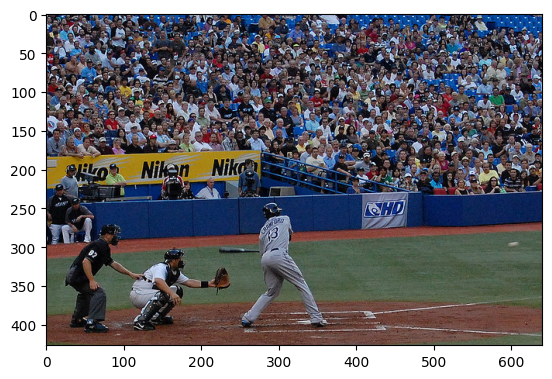

In [35]:
# 이미지 읽어보기 [0]

print(first_item_key[-16:])

print(my_filepath_key[:5])
print(len(my_filepath_key[0]))

# index [0:9999]
im = io.imread(my_filepath_key[23])

plt.imshow(im)
plt.show()

In [36]:
dataset[my_filepath_key[23]]

['<start> A baseball game is going on for the crowd.  <end>',
 '<start> A baseball player holding a bat over the top of a base. <end>',
 '<start> The stands are packed as a baseball player in a gray uniform holds a bat as a catcher holds out his mitt. <end>',
 '<start> A man that has a baseball bat standing in the dirt. <end>',
 '<start> A man swinging a bat at a baseball on a field. <end>']

In [37]:
if load_feature_dict:
  image_features = load_feature_dict


print("Image features length: ", len(image_features))

Image features length:  30000


In [38]:
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(dataset)
max_length

50

In [43]:
#create input-output sequence pairs from the image description.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
        #  description 인 경우 10,000개 
            feature = features[key][0]
            # print("features",type(features), len(features), list(features.keys())[0]) #  features 자체는 image_features dict
            # print("feature",type(feature), len(feature))
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)
            

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    num=0
    # walk through each description for the image
    for desc in desc_list: # desc_list 는 caption의 list를 뜻함
        
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # print(len(seq))
        
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # print("in_seq",in_seq)
            
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=total_words)[0]
            # print("out_seq",out_seq, "\n", len(out_seq))
            
            # store
            # append num
            num+=1
            X1.append(feature) # image features
            X2.append(in_seq)  # Caption input
            y.append(out_seq)  # Caption output
    # print("append 한 횟수 :",num)

    return np.array(X1), np.array(X2), np.array(y)

In [44]:
gen = data_generator(dataset, image_features, tokenizer, max_length)

for i , a in enumerate(gen):
  print(i,":", a[0][0].shape,a[0][1].shape, a[1].shape )
  if i >2 :
    break

# model.fit(gen,epochs,steps_per_epoch)

0 : (49, 512) (49, 50) (49, 15691)
1 : (48, 512) (48, 50) (48, 15691)
2 : (60, 512) (60, 50) (60, 15691)
3 : (58, 512) (58, 50) (58, 15691)


In [51]:
from pycocotools.coco import COCO # COCO python library
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import random
import string

import cv2
import os
from pickle import dump, load
import json

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Dropout, Attention
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from keras.layers import add

from tensorflow.keras.models import Model, load_model

# small library for seeing the progress of loops.
from tqdm.notebook import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Dropout, Attention

# define the captioning model
def define_model(total_words, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    # inputs1 = Input(shape=(2048,)) #for Xception (1,2048)
    inputs1 = Input(shape=(512,))# for VGG 512

    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(total_words, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(total_words, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [53]:
# train our model
import os

try:
  os.mkdir("models")
except:
  print("models folder already exists")

# testsample_dict
caption_model = define_model(total_words, max_length)

models folder already exists
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 256)      4016896     ['input_8[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 512)          0           ['input_7[0][0]']                
                                                               

In [56]:
fit_num=0

BATCH_SIZE = 32


def train_our_model(dataset,batch =BATCH_SIZE, model =caption_model):
  global fit_num
  fit_num+=1

  print('Dataset: ', len(dataset))
  print('Descriptions: train=', len(dataset))
  print('Photos: train=', len(image_features))
  print('Vocabulary Size:', total_words)
  print('Description Length: ', max_length)

  epochs=1
  steps = len(dataset)

  # making a directory models to save our models

  # yield  []
  for i in range(epochs):
      generator = data_generator(dataset, image_features, tokenizer, max_length)
      # model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE)
      history = model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE)      
    # model.fit(generator, epochs=5, steps_per_epoch= steps, verbose=1, batch_size=BATCH_SIZE, validation_set = validation_loss = )      

      model.save("models/model_" + str(i) +str(fit_num)+ ".h5")

In [57]:
train_our_model(dataset)

Dataset:  30000
Descriptions: train= 30000
Photos: train= 30000
Vocabulary Size: 15691
Description Length:  50
30000/30000 [==============================] - 3457s 115ms/step - loss: 3.4666


In [58]:
import matplotlib.pyplot as plt

# Get the training loss history
# train_loss = caption_model.history['loss']
train_loss = caption_model.history.history['loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [63]:
caption_model.summary()
caption_model.save("test_model.h5")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 256)      4016896     ['input_8[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 512)          0           ['input_7[0][0]']                
                                                                                            

In [60]:
# loaded_model = tf.keras.saving.load_model("/content/drive/MyDrive/3조/Models/model_01_vgg16.h5")
loaded_model = tf.keras.saving.load_model("/content/drive/MyDrive/3조/Models/model_01_vgg16_30k_aug(false).h5")



loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 256)      4016896     ['input_8[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 512)          0           ['input_7[0][0]']                
                                                                                            

In [61]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
img_paths = []
for filename in glob.glob('./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/*.jpg'): #assuming jpg
    # im=Image.open(filename)
    # print(filename)
    # print(im)
    img_paths.append(filename)

    if len(img_paths)>10:
      break
print(img_paths)

['./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000571635.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000202658.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000203564.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000410627.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000208408.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000581177.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000153184.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000027842.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_tr

In [62]:
def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = '<start>'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        
        if word is None:
            break
        in_text += ' ' + word
        
        if word == 'end':
            in_text = in_text[:-3]  +"<"+in_text [-3:] + ">"
            break
    return in_text

In [64]:
from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)

vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
) 
vgg16.trainable=False

x = vgg16.output
x = GlobalAveragePooling2D()(x)

modified_vgg16 = Model(inputs=vgg16.input, outputs=x)

In [65]:
photo = extract_features(img_paths[0], modified_vgg16)
img = Image.open(img_paths[0])
description = generate_desc(caption_model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 5s 5s/step



<start> a bathroom with a toilet and a sink <end>


In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
img_paths = []
for filename in glob.glob('./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/*.jpg'): #assuming jpg
    # im=Image.open(filename)
    # print(filename)
    # print(im)
    img_paths.append(filename)

    if len(img_paths)>10:
      break



print(img_paths)

['./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000571635.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000202658.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000203564.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000410627.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000208408.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000581177.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000153184.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000027842.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_tr

In [67]:
len(img_paths)

11

A group of picture of a small boy throwing a ball 
a bathroom with a tub and sink inside of it
A couple sits outside at the wooden table as people walk by.
A bunch of coke bottles with water and pink flowers in them.
Two men with hats are talking to another man.
A man tossing a blue frisbee across a grasscovered field.
A young boy wearing a tie while using a cell phone.
A small child in a helmet playing with a skateboard.
A young boy holding a blue Frisbee with both of his hands.
A woman speaker at a conference breakfast. 
A man standing near a fridge with the door open
A woman standing behind a deli counter filled with food.


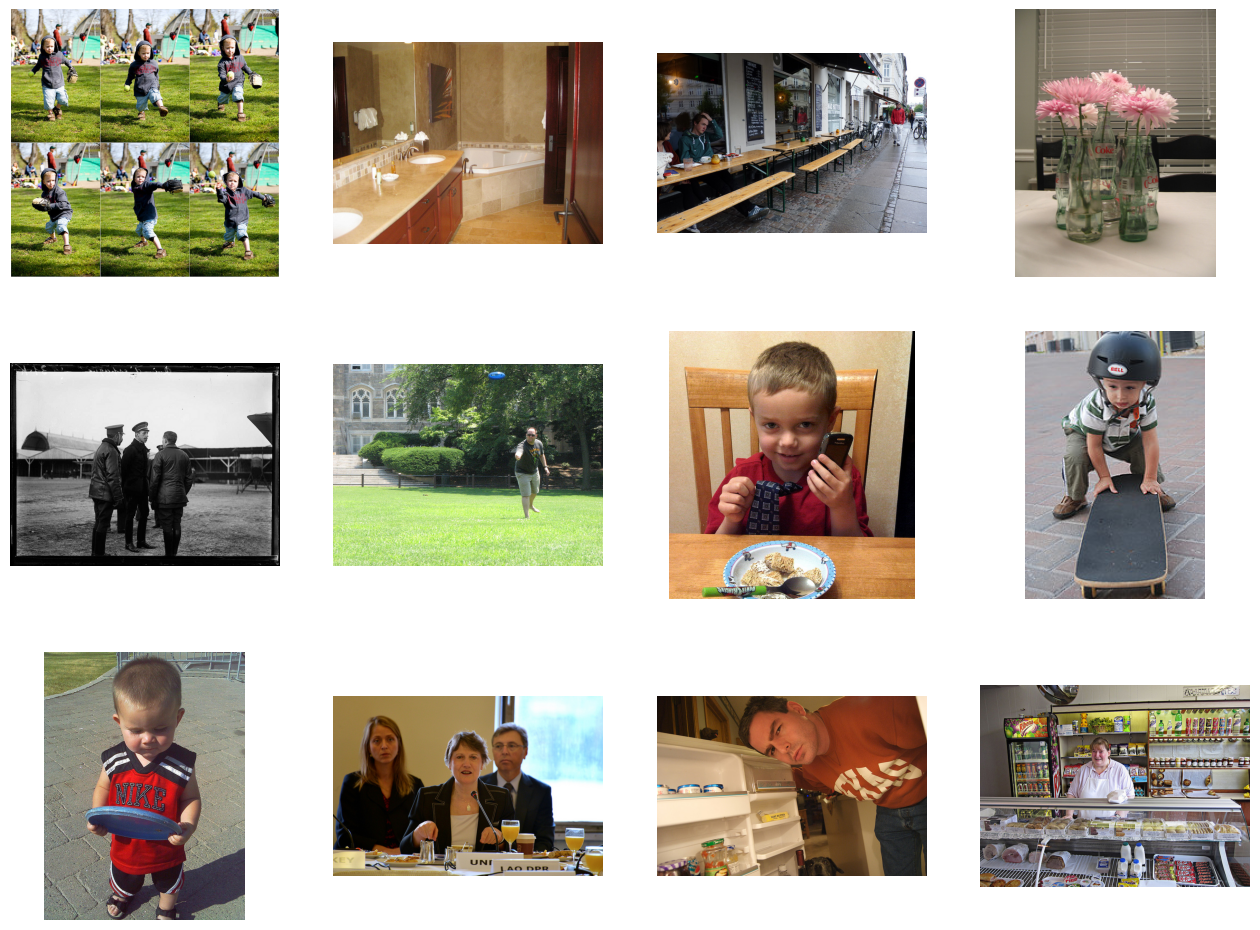

In [68]:
# 랜덤 파일 읽기, imgidss 확인!! -전체코코인지 일부인지
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    I = io.imread(img_path)
    plt.imshow(I)
    print( updated_dict[img_path][0])

plt.show()

1/1 [==============================] - 0s 19ms/step


<start> a bathroom with a toilet and a sink <end>
1/1 [==============================] - 0s 19ms/step


<start> a bathroom with a toilet and a sink <end>
1/1 [==============================] - 0s 18ms/step


<start> a man is standing in the snow with a skateboard <end>
1/1 [==============================] - 0s 19ms/step


<start> a man is sitting on a bed with a laptop computer <end>
1/1 [==============================] - 0s 19ms/step


<start> a man in a red shirt and a red shirt and a red and white umbrella <end>
1/1 [==============================] - 0s 19ms/step


<start> a kitchen with a couch and a table <end>
1/1 [==============================] - 0s 19ms/step


<start> a man is sitting on a bench in the snow <end>
1/1 [==============================] - 0s 22ms/step


<start> a kitchen with a couch and a sink <end>
1/1 [==============================] - 0s 19ms/step


<start> a man in a white shirt and a tie <end>
1/1 [======

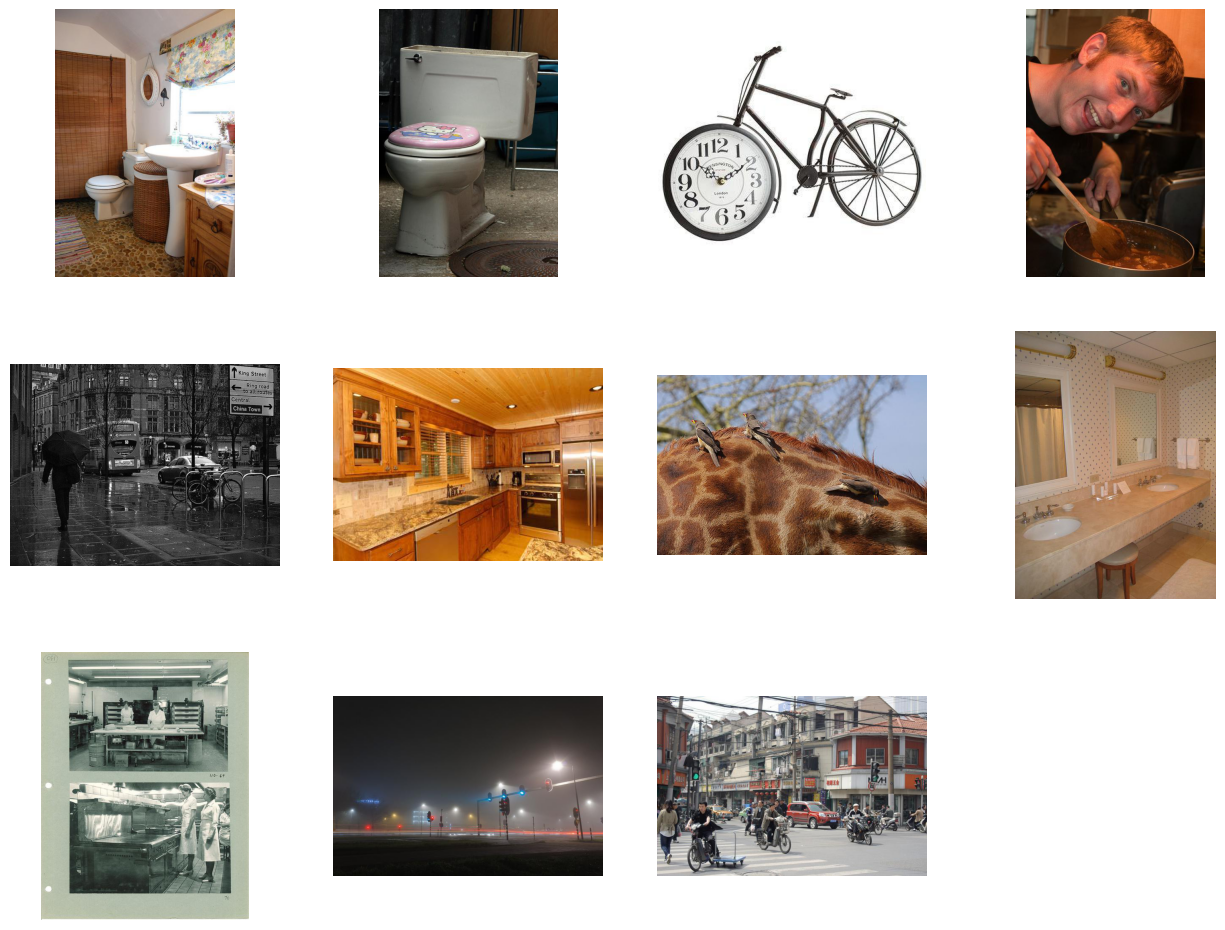

In [69]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

# xception_model = Xception(include_top=False, pooling="avg")
for i, image in enumerate(img_paths):
  photo = extract_features(image,modified_vgg16 )
  img = Image.open(image)
  description = generate_desc(caption_model, tokenizer, photo, 49)
  print("\n")
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off')
  plt.imshow(img)
  print(description)

plt.show()